In [1]:
import pandas as pd
#read in the data
data_df = pd.read_csv("comma-separated-values-file-2.csv")
data_df.head()

,Generation,Age,Ethnic Origin,Gender,Length Of Service,Job Class,Grade,Assignment Category,Salary Range
0,Generation X,42,White (Not Hispanic or Latino),Female,14,NON_MLS,25,Fulltime-Regular,90-99K
1,Generation X,44,Hispanic or Latino,Male,1,NON_MLS,15,Fulltime-Regular,40-49K
2,Generation X,41,Black or African American (Not Hispanic or Lat...,Female,11,NON_MLS,15,Fulltime-Regular,50-59K
3,Generation X,47,White (Not Hispanic or Latino),Male,12,NON_MLS,15,Fulltime-Regular,50-59K
4,Baby Boomers,59,Black or African American (Not Hispanic or Lat...,Female,2,NON_MLS,14,Fulltime-Regular,40-49K


In [2]:
#summary statistics for both numeric and string data
data_df.describe(include = 'all')
#data_df.dtypes

,Generation,Age,Ethnic Origin,Gender,Length Of Service,Job Class,Grade,Assignment Category,Salary Range
count,9243,9243.000000,9243,9243,9243.000000,9243,9243,9243,9243
unique,5,NaN,8,2,NaN,2,70,2,16
top,Generation X,NaN,White (Not Hispanic or Latino),Male,NaN,NON_MLS,15,Fulltime-Regular,60-69K
freq,3834,NaN,4501,5508,NaN,8836,1016,8444,1265
mean,NaN,47.217137,NaN,NaN,12.845072,NaN,NaN,NaN,NaN
std,NaN,12.042355,NaN,NaN,9.311613,NaN,NaN,NaN,NaN
min,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,37.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
50%,NaN,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN
75%,NaN,57.000000,NaN,NaN,19.000000,NaN,NaN,NaN,NaN


In [3]:
data_df['Grade'].describe()

count     9243
unique      70
top         15
freq      1016
Name: Grade, dtype: object

Text(0.5, 1.0, 'Total Missing Value ')

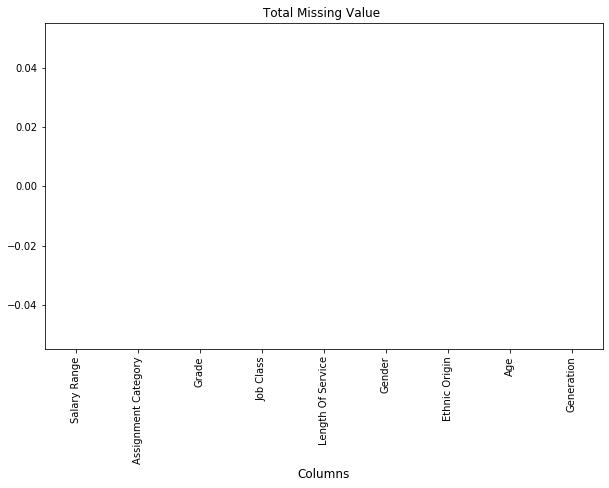

In [4]:
#plot the number of missing value in each column
import matplotlib.pyplot as plt
import seaborn as sns

percent = (data_df.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (10,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 12)
plt.ylabel("", fontsize = 15)
plt.title("Total Missing Value ", fontsize = 12)
#there is no missing value in our dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

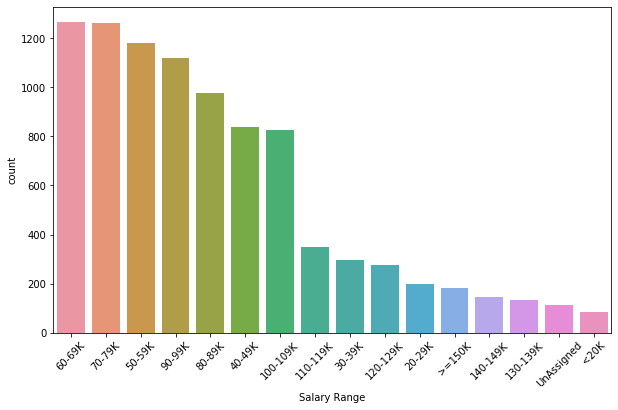

In [5]:
#check for the distribution of salary range
plt.figure(figsize=(10,6))
sns.countplot(x = 'Salary Range',data = data_df, order = pd.value_counts(data_df['Salary Range']).index)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

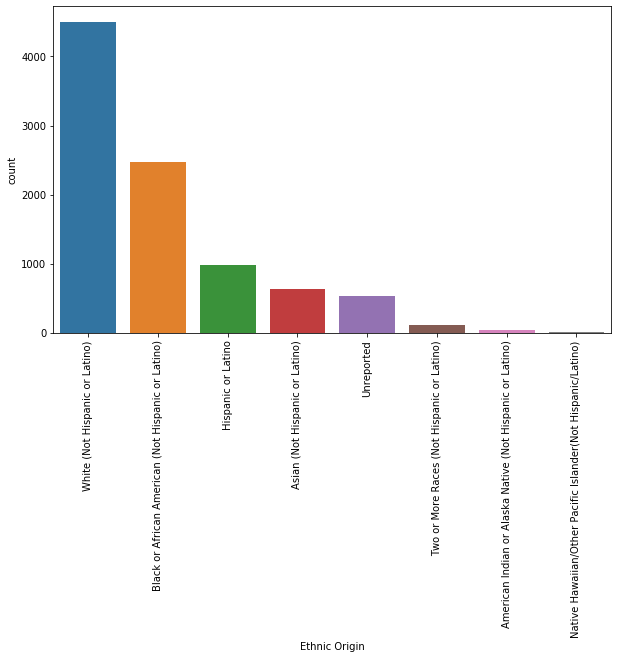

In [6]:
#check the distribution of ethnic origin
plt.figure(figsize=(10,6))
sns.countplot(x = 'Ethnic Origin',data = data_df, order = pd.value_counts(data_df['Ethnic Origin']).index)
plt.xticks(rotation=90)

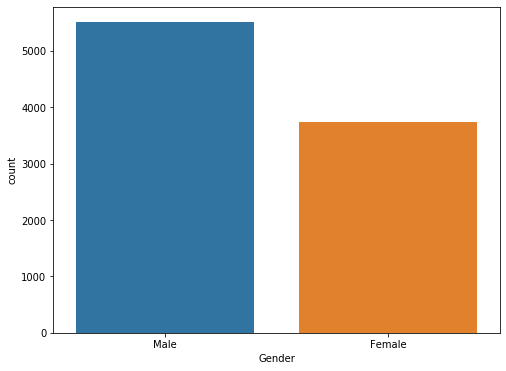

In [7]:
#check the distribution of gender
plt.figure(figsize=(8,6))
sns.countplot(x = 'Gender',data = data_df, order = pd.value_counts(data_df['Gender']).index)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

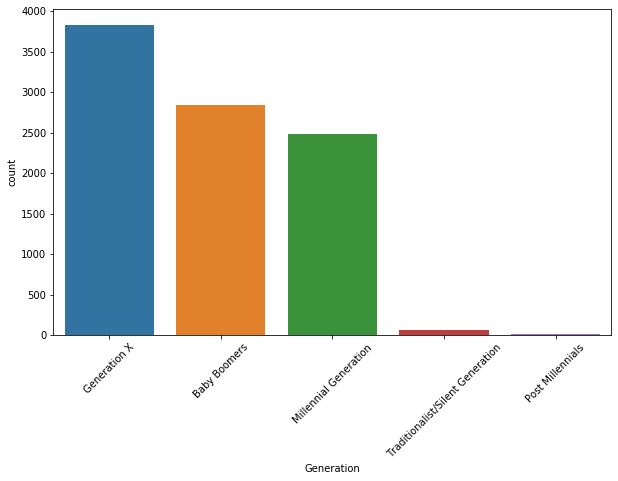

In [8]:
#check the distribution of generation
plt.figure(figsize=(10,6))
sns.countplot(x = 'Generation',data = data_df, order = pd.value_counts(data_df['Generation']).index)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

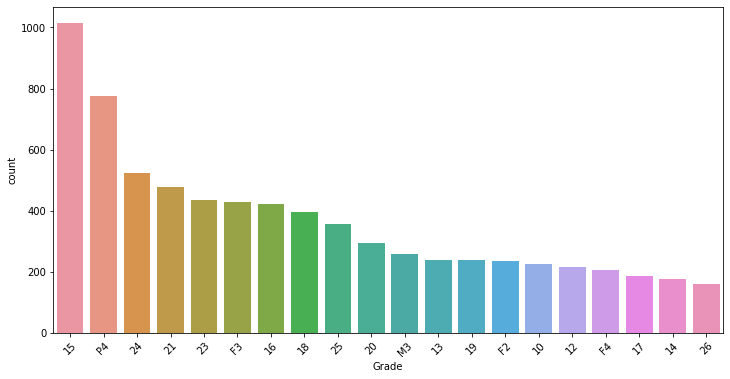

In [9]:
#check the distribution of job grade
plt.figure(figsize=(12,6))
sns.countplot(x = 'Grade',data = data_df, order = pd.value_counts(data_df['Grade']).iloc[:20].index)
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Age Distribution')

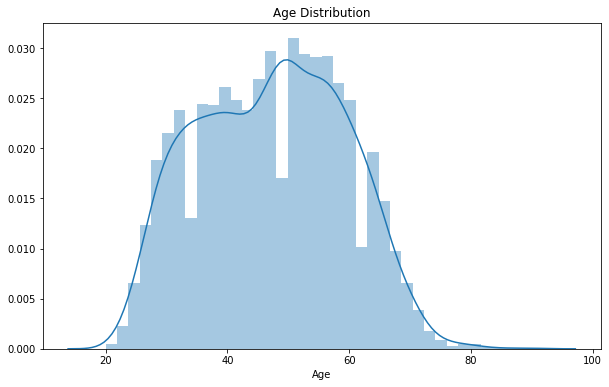

In [10]:
#plot the age distribution
plt.figure(figsize=(10,6))
sns.distplot(data_df.Age).set_title('Age Distribution')

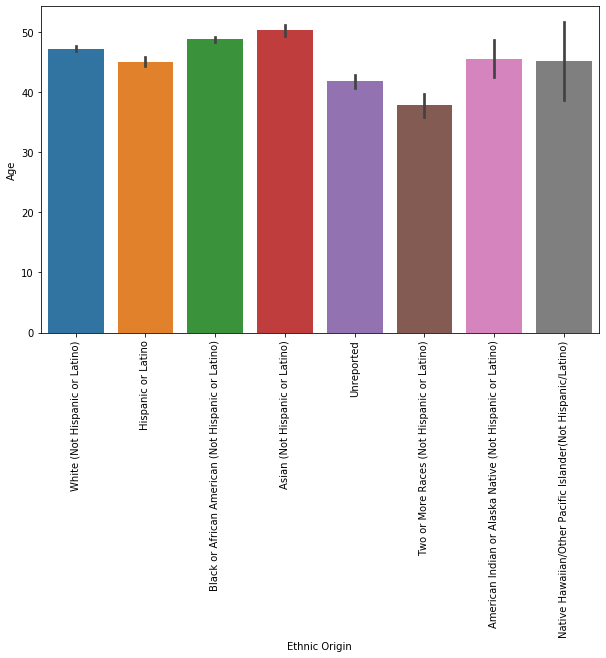

In [11]:
#Average age for each ethnic group
from numpy import mean
plt.figure(figsize=(10,6))
sns.barplot(x = 'Ethnic Origin', y = 'Age', data = data_df, estimator=mean)
plt.xticks(rotation=90)
plt.show()

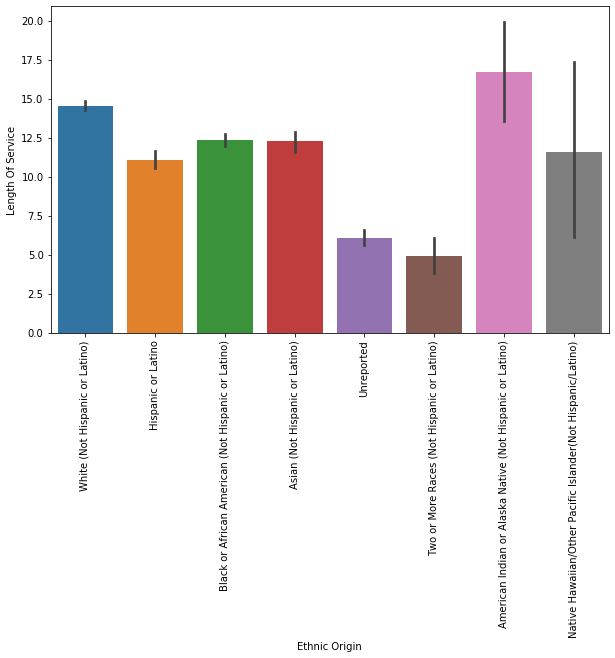

In [12]:
#For each ethnic group, what is their average length of service
plt.figure(figsize=(10,6))
sns.barplot(x = 'Ethnic Origin', y = 'Length Of Service', data = data_df, estimator=mean)
plt.xticks(rotation=90)
plt.show()

In [13]:
#use pivot table to get the average age for each gender of each ethnic origin
age_pivot_df = data_df.pivot_table(index='Ethnic Origin', columns='Gender', values='Age')
age_pivot_df

Gender,Female,Male
Ethnic Origin,,
American Indian or Alaska Native (Not Hispanic or Latino),46.666667,45.080000
Asian (Not Hispanic or Latino),51.801205,48.572391
Black or African American (Not Hispanic or Latino),49.185756,48.546154
Hispanic or Latino,46.193684,43.907445
Native Hawaiian/Other Pacific Islander(Not Hispanic/Latino),43.000000,45.375000
Two or More Races (Not Hispanic or Latino),39.407407,36.020000
Unreported,43.411765,40.816199
White (Not Hispanic or Latino),51.176434,45.040972


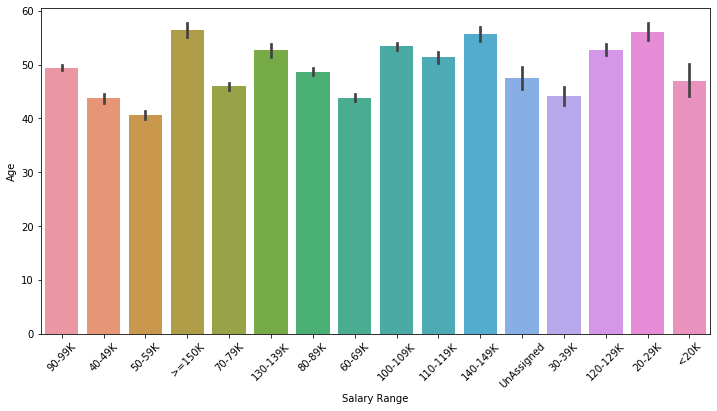

In [14]:
#average age for each salary level
plt.figure(figsize=(12,6))
sns.barplot(x = 'Salary Range', y = 'Age', data = data_df, estimator=mean)
plt.xticks(rotation=45)
plt.show()

In [15]:
#creat a dummy column with all "1", then we can use this column in pivot table to count the number of categorical variable
data_df2 = data_df
data_df2['count_dummy'] = 1
data_df2.head()

,Generation,Age,Ethnic Origin,Gender,Length Of Service,Job Class,Grade,Assignment Category,Salary Range,count_dummy
0,Generation X,42,White (Not Hispanic or Latino),Female,14,NON_MLS,25,Fulltime-Regular,90-99K,1
1,Generation X,44,Hispanic or Latino,Male,1,NON_MLS,15,Fulltime-Regular,40-49K,1
2,Generation X,41,Black or African American (Not Hispanic or Lat...,Female,11,NON_MLS,15,Fulltime-Regular,50-59K,1
3,Generation X,47,White (Not Hispanic or Latino),Male,12,NON_MLS,15,Fulltime-Regular,50-59K,1
4,Baby Boomers,59,Black or African American (Not Hispanic or Lat...,Female,2,NON_MLS,14,Fulltime-Regular,40-49K,1


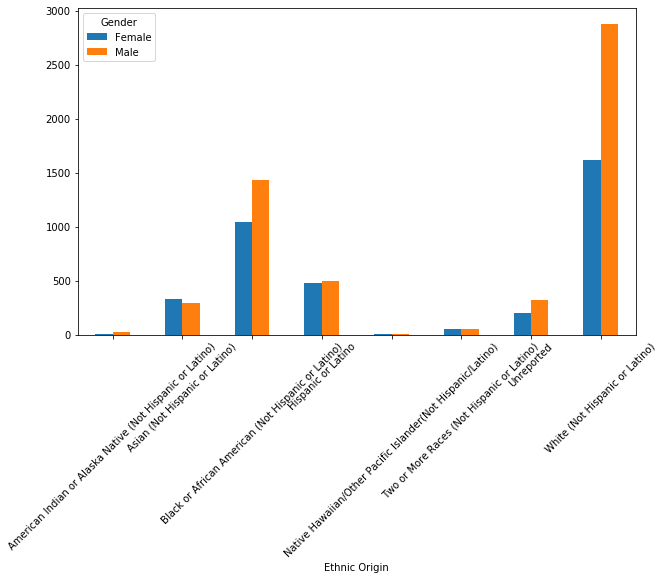

In [16]:
import numpy as np
#for each ethnic origin, check the gender distribution and plot the output
temp_df = pd.pivot_table(data_df2,  values='count_dummy',  columns=['Gender'],  index = "Ethnic Origin",
                         aggfunc=np.sum,  fill_value=0)

temp_df.plot(kind="bar", figsize=(10,6))
plt.xticks(rotation=45)
plt.show()

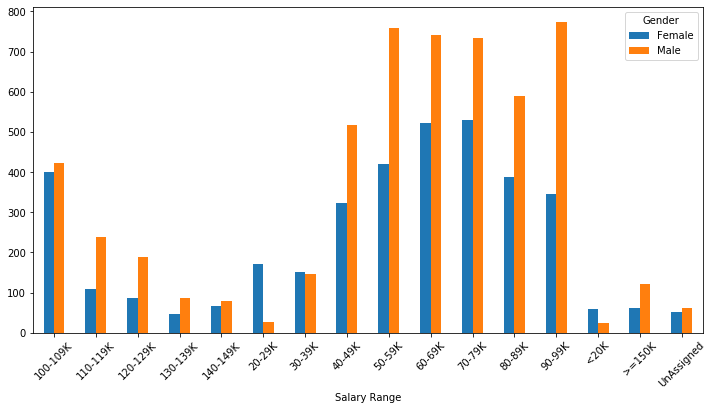

In [17]:
#for each salary range, check the gender distribution and plot the output
temp_df = pd.pivot_table(data_df2,  values='count_dummy',  columns=['Gender'],  index = "Salary Range",
                         aggfunc=np.sum,  fill_value=0)

temp_df.plot(kind="bar", figsize=(12,6))
plt.xticks(rotation=45)
plt.show()

In [18]:
#for each ethnic origin, count the number of employees in each salary range
temp_df = pd.pivot_table(data_df2,  values='count_dummy',  columns=['Salary Range'],  index = "Ethnic Origin",
                         aggfunc=np.sum,  fill_value=0)

temp_df

Salary Range,100-109K,110-119K,120-129K,130-139K,140-149K,20-29K,30-39K,40-49K,50-59K,60-69K,70-79K,80-89K,90-99K,<20K,>=150K,UnAssigned
Ethnic Origin,,,,,,,,,,,,,,,,
American Indian or Alaska Native (Not Hispanic or Latino),6,2,1,1,1,0,1,2,5,1,5,4,5,0,0,0
Asian (Not Hispanic or Latino),66,22,39,7,16,28,26,49,58,87,84,58,66,4,12,7
Black or African American (Not Hispanic or Latino),174,51,33,17,20,27,104,398,394,349,354,247,219,8,34,40
Hispanic or Latino,54,16,19,4,4,24,38,129,186,150,141,94,81,9,8,15
Native Hawaiian/Other Pacific Islander(Not Hispanic/Latino),1,1,0,0,0,0,0,2,2,0,0,1,1,0,0,1
Two or More Races (Not Hispanic or Latino),1,0,1,0,1,3,5,16,28,25,13,3,4,1,0,3
Unreported,24,5,11,5,4,9,34,70,116,90,48,45,25,19,7,13
White (Not Hispanic or Latino),498,251,171,99,100,106,90,173,390,563,618,526,718,43,121,34


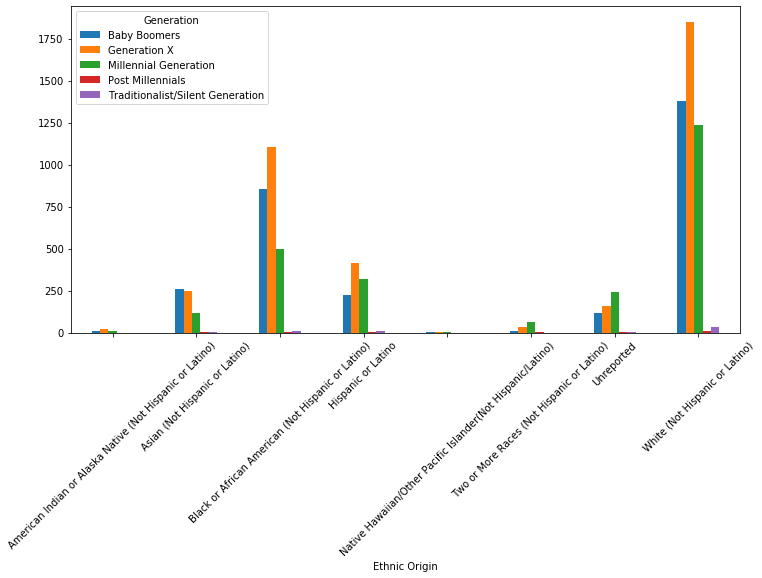

In [19]:
#for each ethnic origin, check the generation distribution and plot the output
temp_df = pd.pivot_table(data_df2,  values='count_dummy',  columns=['Generation'],  index = "Ethnic Origin",
                         aggfunc=np.sum,  fill_value=0)

temp_df.plot(kind="bar", figsize=(12,6))
plt.xticks(rotation=45)
plt.show()

In [65]:
#for each generation, each gender, count the number of employees in each salary range.
temp_df = pd.pivot_table(data_df2,  values='count_dummy',  columns=['Salary Range'],  index = ['Generation', 'Gender'],
                         aggfunc=np.sum,  fill_value=0)

temp_df

Salary Range                             100-109K  110-119K  120-129K  \
Generation                       Gender                                 
Baby Boomers                     Female       225        52        49   
                                 Male         167        61        67   
Generation X                     Female       154        44        30   
                                 Male         218       164       113   
Millennial Generation            Female        17        11         6   
                                 Male          33        12         7   
Post Millennials                 Female         0         0         0   
                                 Male           0         0         0   
Traditionalist/Silent Generation Female         5         2         1   
                                 Male           5         2         2   

Salary Range                             130-139K  140-149K  20-29K  30-39K  \
Generation                       Gender                                       
Baby Boomers                     Female        24        45     110      49   
                                 Male          31        43      14      21   
Generation X                     Female        21        23      43      54   
                                 Male          55        34       5      51   
Millennial Generation            Female         2         0      12      43   
                                 Male           0         1       5      72   
Post Millennials                 Female         0         0       0       2   
                                 Male           0         0       0       1   
Traditionalist/Silent Generation Female         0         0       6       4   
                                 Male           0         0       2       1   

Salary Range                             40-49K  50-59K  60-69K  70-79K  \
Generation                       Gender                                   
Baby Boomers                     Female      88      93     172     195   
                                 Male        98     127     158     168   
Generation X                     Female     124     131     166     201   
                                 Male       213     220     207     253   
Millennial Generation            Female     108     193     181     131   
                                 Male       201     407     374     310   
Post Millennials                 Female       2       1       0       0   
                                 Male         3       5       0       0   
Traditionalist/Silent Generation Female       1       2       4       2   
                                 Male         1       0       3       3   

Salary Range                             80-89K  90-99K  <20K  >=150K  \
Generation                       Gender                                 
Baby Boomers                     Female     152     119    26      39   
                                 Male       160     180    10      67   
Generation X                     Female     178     202    19      21   
                                 Male       274     519     1      46   
Millennial Generation            Female      56      21    11       1   
                                 Male       154      72    11       5   
Post Millennials                 Female       0       0     4       0   
                                 Male         0       0     2       0   
Traditionalist/Silent Generation Female       2       4     0       0   
                                 Male         2       2     0       3   

Salary Range                             UnAssigned  
Generation                       Gender              
Baby Boomers                     Female          15  
                                 Male            22  
Generation X                     Female          25  
                                 Male            25  
Millennial Generation            Female          11  
                  

In [63]:
#for each job class, each assignment category, count the number of employees in each salary range.
temp_df = pd.pivot_table(data_df2,  values='count_dummy',  columns=['Salary Range'],  index = ['Job Class', 'Assignment Category'],
                         aggfunc=np.sum,  fill_value=0)

temp_df

Salary Range                   100-109K  110-119K  120-129K  130-139K  \
Job Class Assignment Category                                           
MLS       Fulltime-Regular           17        32        56        52   
          Parttime-Regular            0         0         1         0   
NON_MLS   Fulltime-Regular          806       316       218        81   
          Parttime-Regular            1         0         0         0   

Salary Range                   140-149K  20-29K  30-39K  40-49K  50-59K  \
Job Class Assignment Category                                             
MLS       Fulltime-Regular          108       0       0       0       0   
          Parttime-Regular            1       0       0       0       0   
NON_MLS   Fulltime-Regular           37       0      93     691    1122   
          Parttime-Regular            0     197     205     148      57   

Salary Range                   60-69K  70-79K  80-89K  90-99K  <20K  >=150K  \
Job Class Assignment Category                                                 
MLS       Fulltime-Regular          0       0       3       9     0     126   
          Parttime-Regular          0       1       1       0     0       0   
NON_MLS   Fulltime-Regular       1209    1253     965    1102     0      54   
          Parttime-Regular         56       9       9       8    84       2   

Salary Range                   UnAssigned  
Job Class Assignment Category              
MLS       Fulltime-Regular              0  
          Parttime-Regular              0  
NON_MLS   Fulltime-Regular             94  
          Parttime-Regular             19

In [42]:
#checn different salary level
a = data_df['Salary Range'].unique()
print(a)

['90-99K' '40-49K' '50-59K' '>=150K' '70-79K' '130-139K' '80-89K' '60-69K'
 '100-109K' '110-119K' '140-149K' 'UnAssigned' '30-39K' '120-129K'
 '20-29K' '<20K']


In [43]:
#split the salary range into three categories
low_income = ['<20K', '20-29K', '30-39K', '40-49K', '50-59K']
mid_income = ['60-69K', '70-79K', '80-89K', '90-99K', '100-109K']
high_income = ['110-119K', '120-129K', '130-139K', '140-149K', '>=150K']

In [44]:
#based on the salary range field, I devided the dataset into three different parts
#if an employee has salary lower than 60K, classified as low salary. 
#If an employee has salary greater than 60K and less than 110K, classified as midium salary
#If an employee has salary greater than 110K, classified as high salary
def income_cat(income):
    if income in low_income:
        return 'Low Salary'
    elif income in mid_income:
        return 'Medium Salary'
    elif income in high_income:
        return 'High Salary'


In [45]:
data_df["salary_category"] = data_df["Salary Range"].apply(income_cat)

In [46]:
#create three dataframes, one for each income category
low_salary_df = data_df[data_df['salary_category'] == "Low Salary"]
mid_salary_df = data_df[data_df['salary_category'] == "Medium Salary"]
high_salary_df = data_df[data_df['salary_category'] == "High Salary"]

In [48]:
#compute average age for each income category, then combined results in a dataframe
avg_age = [low_salary_df["Age"].mean(axis=0), mid_salary_df["Age"].mean(axis=0), 
             high_salary_df["Age"].mean(axis=0)]
income_cat = ["Low Salary", "Medium Salary", "High Salary"]

avg_age_df = pd.DataFrame(list(zip(income_cat, avg_age)), columns =['Salary_category', 'Average_age'])
avg_age_df

,Salary_category,Average_age
0,Low Salary,43.406623
1,Medium Salary,47.814094
2,High Salary,53.311808


In [49]:
#For each income category, get the most common ethnic origin of employees
low_salary_ethnic_origin = low_salary_df['Ethnic Origin'].value_counts().index.tolist()
mid_salary_ethnic_origin = mid_salary_df['Ethnic Origin'].value_counts().index.tolist()
high_salary_ethnic_origin = high_salary_df['Ethnic Origin'].value_counts().index.tolist()

ethnic_origin_df = pd.DataFrame(list(zip(low_salary_ethnic_origin, mid_salary_ethnic_origin, high_salary_ethnic_origin)), 
                               columns =['Most Common Ethnic Origin of Low Salary Group', 'Most Common Ethnic Origin of Medium Salary Group', 
                                         'Most Common Ethnic Origin of High Salary Group'])
ethnic_origin_df

,Most Common Ethnic Origin of Low Salary Group,Most Common Ethnic Origin of Medium Salary Group,Most Common Ethnic Origin of High Salary Group
0,Black or African American (Not Hispanic or Lat...,White (Not Hispanic or Latino),White (Not Hispanic or Latino)
1,White (Not Hispanic or Latino),Black or African American (Not Hispanic or Lat...,Black or African American (Not Hispanic or Lat...
2,Hispanic or Latino,Hispanic or Latino,Asian (Not Hispanic or Latino)
3,Unreported,Asian (Not Hispanic or Latino),Hispanic or Latino
4,Asian (Not Hispanic or Latino),Unreported,Unreported
5,Two or More Races (Not Hispanic or Latino),Two or More Races (Not Hispanic or Latino),American Indian or Alaska Native (Not Hispanic...
6,American Indian or Alaska Native (Not Hispanic...,American Indian or Alaska Native (Not Hispanic...,Two or More Races (Not Hispanic or Latino)
7,Native Hawaiian/Other Pacific Islander(Not His...,Native Hawaiian/Other Pacific Islander(Not His...,Native Hawaiian/Other Pacific Islander(Not His...


In [50]:
#For each income category, get the most common generation of employees
low_salary_generation = low_salary_df['Generation'].value_counts().index.tolist()
mid_salary_generation = mid_salary_df['Generation'].value_counts().index.tolist()
high_salary_generation = high_salary_df['Generation'].value_counts().index.tolist()

generation_df = pd.DataFrame(list(zip(low_salary_generation, mid_salary_generation, high_salary_generation)), 
                               columns =['Most Common Generation of Low Salary Group', 'Most Common Generation of Medium Salary Group', 
                                         'Most Common Generation of High Salary Group'])
generation_df

,Most Common Generation of Low Salary Group,Most Common Generation of Medium Salary Group,Most Common Generation of High Salary Group
0,Millennial Generation,Generation X,Generation X
1,Generation X,Baby Boomers,Baby Boomers
2,Baby Boomers,Millennial Generation,Millennial Generation
3,Post Millennials,Traditionalist/Silent Generation,Traditionalist/Silent Generation


In [52]:
#For each income category, get the top 15 common job grade
n = 15
low_salary_grade = low_salary_df['Grade'].value_counts()[:n].index.tolist()
mid_salary_grade = mid_salary_df['Grade'].value_counts()[:n].index.tolist()
high_salary_grade = high_salary_df['Grade'].value_counts()[:n].index.tolist()

grade_df = pd.DataFrame(list(zip(low_salary_grade, mid_salary_grade, high_salary_grade)), 
                               columns =['Top 15 Common Job Grade of Low Salary Group', 'Top 15 Common Job Grade of Medium Salary Group', 
                                         'Top 15 Common Job Grade of High Salary Group'])
grade_df

,Top 15 Common Job Grade of Low Salary Group,Top 15 Common Job Grade of Medium Salary Group,Top 15 Common Job Grade of High Salary Group
0,15,P4,M3
1,10,24,B2
2,12,21,28
3,F2,23,M2
4,16,F3,A1
5,13,25,26
6,18,15,32
7,14,16,A2
8,P2,18,25
9,17,20,M1


In [53]:
#read in the second data
supplement_df = pd.read_csv("Average_Salary_by_Job_Classification.csv")
supplement_df.head()

,Position Title,Position Class Code,Grade,Average of Base Salary,Number of Employees
0,Information Technology Expert,550,32,"$146,925.34",9
1,Accountant/Auditor II,210,21,"$82,742.44",2
2,Veterinary Assistant,206513,15,"$45,925.44",2
3,Police Aide,3506,15,"$58,628.63",15
4,ERP Functional Business Analyst,100546,30,"$133,797.25",3


In [55]:
#check from unique value in the Grade column
b = supplement_df['Grade'].unique()
len(b)

60

In [56]:
supplement_df.dtypes

Position Title            object
Position Class Code        int64
Grade                     object
Average of Base Salary    object
Number of Employees        int64
dtype: object

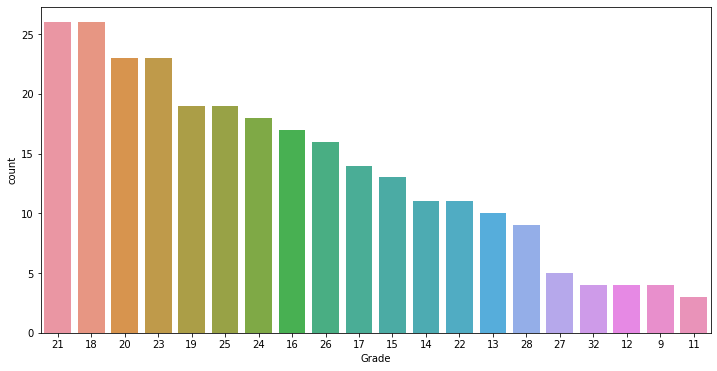

In [59]:
#check the distribution of the Grade variable
plt.figure(figsize=(12,6))
sns.countplot(x = 'Grade',data = supplement_df, order = pd.value_counts(supplement_df['Grade']).iloc[:20].index)
plt.show()

In [60]:
#find out the top 20 position that have the largest number of employees
top20_positions = supplement_df[["Position Title", "Number of Employees"]].sort_values('Number of Employees', ascending=False).head(20)
top20_positions

,Position Title,Number of Employees
158,Police Officer III,811
238,Transit Bus Operator,623
307,Firefighter/Rescuer III,409
319,Manager III,252
74,Office Services Coordinator,210
171,Master Firefighter/Rescuer,210
268,Program Manager II,175
75,Police Sergeant,157
272,Community Health Nurse II,148
249,Correctional Officer III (Corporal),142


In [61]:
#convert the values in Average Base Salary column from currency object to float
supplement_df[supplement_df.columns[3]] = supplement_df[supplement_df.columns[3]].replace('[\$,]', '', regex=True).astype(float)
supplement_df.head()

,Position Title,Position Class Code,Grade,Average of Base Salary,Number of Employees
0,Information Technology Expert,550,32,146925.34,9
1,Accountant/Auditor II,210,21,82742.44,2
2,Veterinary Assistant,206513,15,45925.44,2
3,Police Aide,3506,15,58628.63,15
4,ERP Functional Business Analyst,100546,30,133797.25,3


In [62]:
#find out the top 20 position that have the highest average base salary
top20_high_salary_positions = supplement_df[["Position Title", "Average of Base Salary"]].sort_values('Average of Base Salary', 
                                                                                                      ascending=False).head(20)
top20_high_salary_positions

,Position Title,Average of Base Salary
278,Medical Doctor Psychiatrist IV,223953.00
155,Medical Doctor Psychiatrist III,203593.00
9,Manager I,182281.86
176,Information Technology Project Manager,182075.00
131,Senior Investment Officer,171350.49
212,Fire/Rescue Division Chief,168617.00
220,Chief Veterinarian,162707.55
28,Manager II,160257.48
258,Enterprise Technology Expert,159475.00
284,Chief Deputy Sheriff (Colonel),159332.00


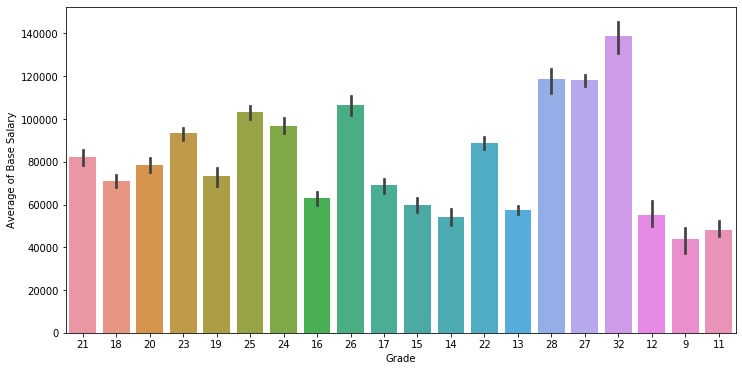

In [64]:
#plot job grade vs Average of Base Salary, for top 20 most frequent job grade
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Grade", y="Average of Base Salary", data=supplement_df, order = pd.value_counts(supplement_df['Grade']).iloc[:20].index)